# Clustering del dataset chess_final con Algoritmo K-means

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler #esto es importante!! dado que kmeans es susceptible a diferentes escalas
from sklearn.cluster import KMeans


#Cargando los datos

In [2]:
df=pd.read_csv('/content/chess_final.csv')

In [ ]:
df.head(3)

,rank,name,elo,title,country,games,birth_year,continent,age
0,1,Magnus Carlsen,2864,SGM,Norway,3125,1990,ame,34
1,2,Liren Ding,2806,SGM,China,1630,1992,asia,32
2,3,Alireza Firouzja,2793,GM,France,845,2003,ame,21


# Analizando la data

In [3]:
df.describe()

,rank,elo,games,birth_year,age
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,2662.385000,1394.185000,1989.395000,34.605000
std,57.879185,47.208793,776.177129,9.057548,9.057548
min,1.000000,2608.000000,277.000000,1965.000000,18.000000
25%,50.750000,2623.750000,785.000000,1984.000000,28.000000
50%,100.500000,2650.500000,1211.000000,1990.000000,34.000000
75%,150.250000,2686.000000,1784.000000,1996.000000,40.000000
max,200.000000,2864.000000,3913.000000,2006.000000,59.000000


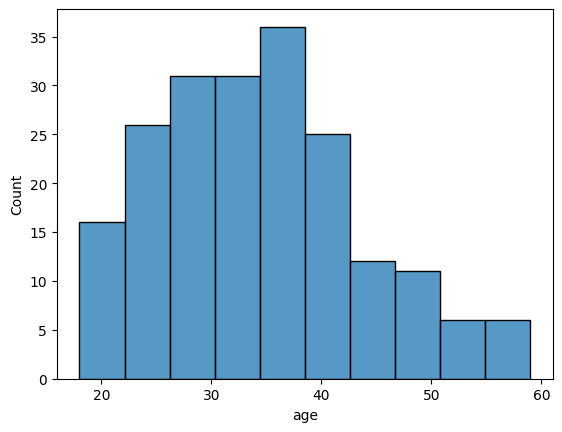

In [9]:
sns.histplot(df['age'])
plt.show()

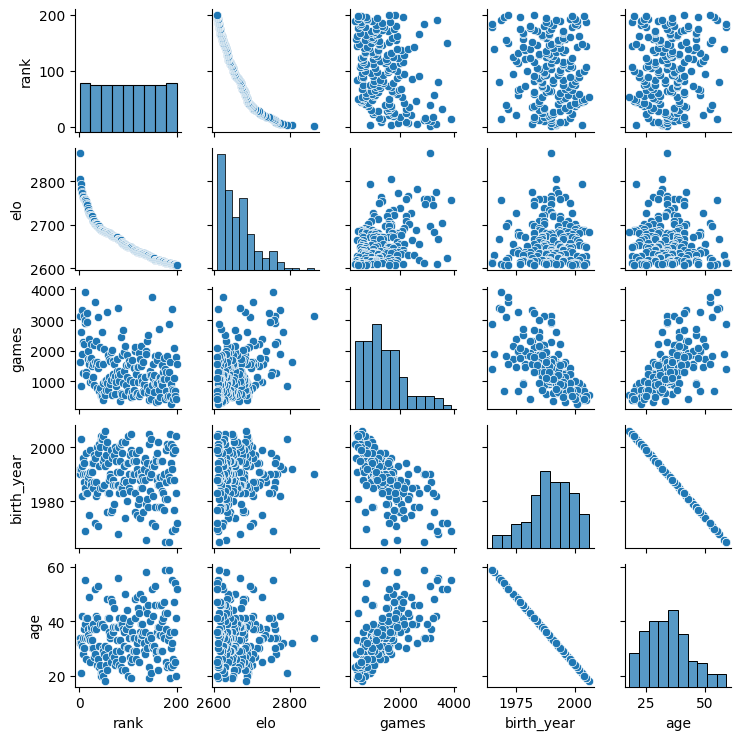

In [10]:
sns.pairplot(df, height=1.5)
plt.show()

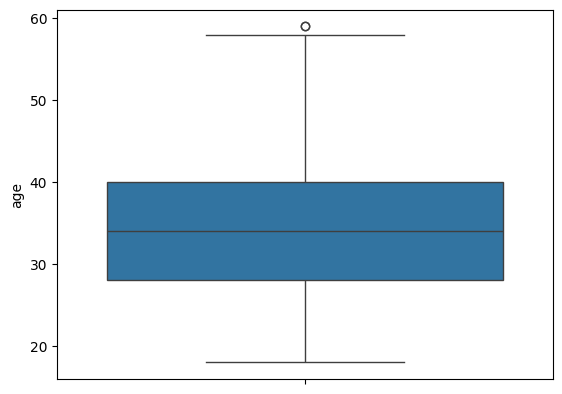

In [11]:
sns.boxplot(df['age'])
plt.show()

In [16]:
df_veter=df[df['age']>50]
df_veter

,rank,name,elo,title,country,games,birth_year,continent,age
12,13,Viswanathan Anand,2756,SGM,India,3913,1969,asia,55
31,32,Alexei Shirov,2704,SGM,Spain,3578,1972,ame,52
38,39,Michael Adams,2696,GM,United Kingdom,3102,1971,ame,53
78,79,Boris Gelfand,2668,GM,Israel,3394,1968,asia,56
137,138,Evgeny Bareev,2631,GM,Canada,1885,1966,ame,58
149,150,Loek Van Wely,2624,GM,Netherlands,3749,1972,ame,52
154,155,Vladimir Akopian,2620,GM,United States,1830,1971,ame,53
176,177,Miguel Illescas Cordoba,2614,GM,Spain,1402,1965,ame,59
183,184,Nigel D Short,2612,SGM,United Kingdom,2875,1965,ame,59
189,190,Aleksey Dreev,2610,GM,Russian Federation,3360,1969,ame,55


#Preprocesamiento con MinMaxScaler

In [17]:
# Seleccionar las variables
X = df[['elo', 'age']]

# Escalar las variables
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
type(X_scaled)

numpy.ndarray

# Determinar el número óptimo de clusters (k) - Método del codo

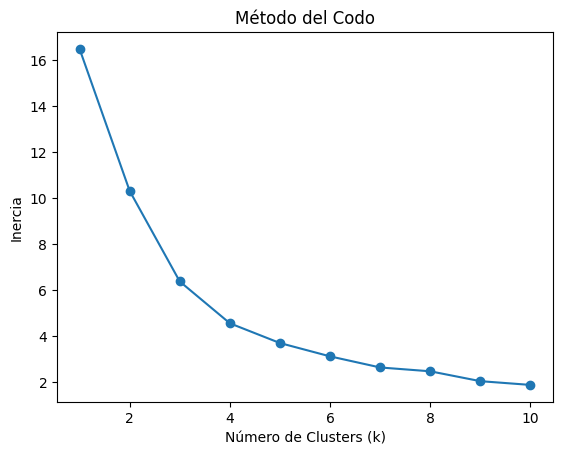

In [21]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.show()
# Observando el gráfico para identificar el 'codo', podria ser 3 o 4

#Entrenamiento del modelo con Kmeans

In [24]:
# Aplicar K-means (asumiendo k=3 según el método del codo)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_


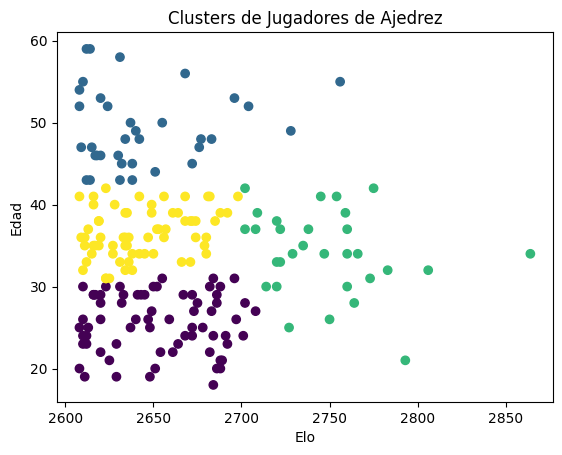

In [25]:

# Visualizar los clusters
plt.scatter(df['elo'], df['age'], c=df['cluster'])
plt.title('Clusters de Jugadores de Ajedrez')
plt.xlabel('Elo')
plt.ylabel('Edad')
plt.show()

#Análisis de los resultados

Uniendo la data y métricas

In [26]:
# Analizar los clusters (ejemplo: media de Elo por cluster)
print(df.groupby('cluster')['elo'].mean())

cluster
0    2652.942029
1    2643.428571
2    2747.566667
3    2643.590909
Name: elo, dtype: float64


In [27]:
df

,rank,name,elo,title,country,games,birth_year,continent,age,cluster
0,1,Magnus Carlsen,2864,SGM,Norway,3125,1990,ame,34,2
1,2,Liren Ding,2806,SGM,China,1630,1992,asia,32,2
2,3,Alireza Firouzja,2793,GM,France,845,2003,ame,21,2
3,4,Fabiano Caruana,2783,SGM,United States,2622,1992,ame,32,2
4,5,Levon Aronian,2775,GM,United States,3320,1982,ame,42,2
...,...,...,...,...,...,...,...,...,...,...
195,196,Boris Alterman,2608,GM,Israel,697,1970,asia,54,1
196,197,Chithambaram VR Aravindh,2608,GM,India,535,1999,asia,25,0
197,198,Jonas Buhl Bjerre,2608,GM,Denmark,411,2004,ame,20,0
198,199,Surya Shekhar Ganguly,2608,GM,India,1811,1983,asia,41,3


#Gráfica de resultados

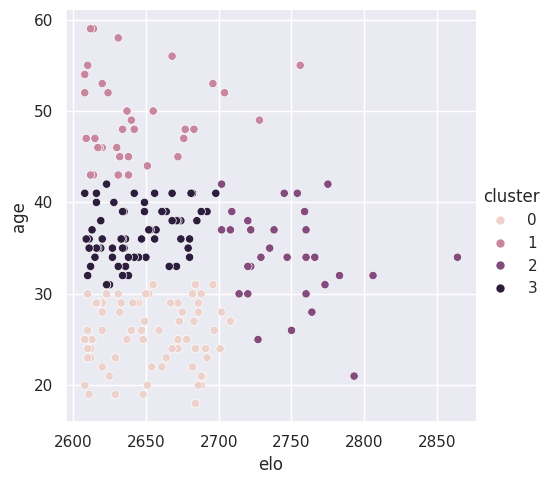

In [29]:
sns.set(style='darkgrid')
sns.relplot(data= df, x = 'elo', y ='age',hue='cluster')
plt.show()